### Setup

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report, accuracy_score, f1_score
from __future__ import print_function

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Get test and training from respective files

In [5]:
X_test = pd.read_csv('./UCI HAR Dataset/test/X_test.txt', sep='\s+', 
           names = pd.read_csv('./UCI HAR Dataset/features.txt', sep = '\s+', header = None)[1], header = None)

In [6]:
X_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [7]:
y_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt', sep='\s+', 
           names = ["activity"], header = None)
y_test.head()

,activity
0,5
1,5
2,5
3,5
4,5


In [8]:
X_train = pd.read_csv('./UCI HAR Dataset/train/X_train.txt', sep='\s+', 
           names = pd.read_csv('./UCI HAR Dataset/features.txt', sep = '\s+', header = None)[1], header = None)

In [9]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [11]:
y_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt', sep='\s+', 
           names = ["activity"], header = None)
y_train.head()

,activity
0,5
1,5
2,5
3,5
4,5


### Drop duplicate columns in X_train and X_test

In [10]:
def to_delete_dup_cols(df):
    Cols = list(df.columns)
    for i,item in enumerate(df.columns):
        if item in df.columns[:i]: Cols[i] = "toDROP"
    df.columns = Cols
    df = df.drop("toDROP",1)
    return df
X_test = to_delete_dup_cols(X_test)
X_train = to_delete_dup_cols(X_train)

### Plot frequency of activity in training and test sets

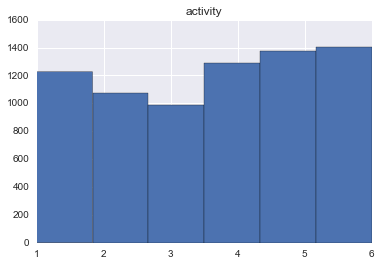

In [51]:
y_train.hist(bins=6)
plt.xlim(1,6)
plt.show()

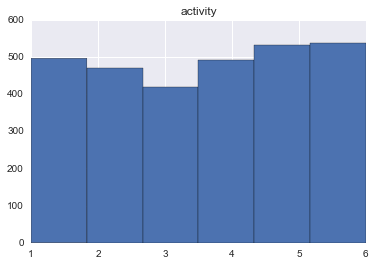

In [52]:
y_test.hist(bins=6)
plt.xlim(1,6)
plt.show()

### Fit Random Forest Classifier for 500 and 50 estimators

In [20]:
rfc = RandomForestClassifier(n_estimators=500, oob_score=True)

In [21]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [16]:
rfc50 = RandomForestClassifier(n_estimators=50, oob_score=True)
rfc50.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

### Get the top 10 Features based on importance scores

In [24]:
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X_train), 
             reverse=True)[:10])

[(0.0348, 'tGravityAcc-min()-X'), (0.0297, 'tGravityAcc-energy()-X'), (0.0283, 'tGravityAcc-mean()-X'), (0.0276, 'angle(Y,gravityMean)'), (0.0273, 'tGravityAcc-mean()-Y'), (0.0269, 'angle(X,gravityMean)'), (0.0255, 'tGravityAcc-min()-Y'), (0.0246, 'tGravityAcc-max()-X'), (0.0231, 'tGravityAcc-max()-Y'), (0.015, 'tGravityAcc-energy()-Y')]


### Compare 500 estimators vs 50 estimators oob_score

In [25]:
rfc.oob_score_

0.98340587595212192

In [18]:
rfc50.oob_score_

0.9787812840043526

### Confusion matrix, accuract, F1 score, and Classification Report for 500 estimators

In [40]:
y_pred = rfc.predict(X_test)
y_pred

array([5, 5, 5, ..., 2, 2, 1])

In [56]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:\n", accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names = ["WALKING", "WALKING_UPSTAIRS", 
                                                                            "WALKING_DOWNSTAIRS", "SITTING",
                                                                             "STANDING", "LAYING"]))

Confusion matrix:
 [[483   5   8   0   0   0]
 [ 31 434   6   0   0   0]
 [ 22  44 354   0   0   0]
 [  0   0   0 436  55   0]
 [  0   0   0  44 488   0]
 [  0   0   0   0   0 537]]
Accuracy:
 0.927044451985
F1 Score:  0.92674791513
Classification Report:
                     precision    recall  f1-score   support

           WALKING       0.90      0.97      0.94       496
  WALKING_UPSTAIRS       0.90      0.92      0.91       471
WALKING_DOWNSTAIRS       0.96      0.84      0.90       420
           SITTING       0.91      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
            LAYING       1.00      1.00      1.00       537

       avg / total       0.93      0.93      0.93      2947



In [ ]:
### Precision_recal 

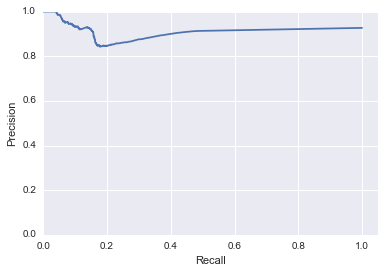

In [45]:
decision_values = rfc.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve([y_test.iloc[i] == y_pred[i] for i in range(0,len(y_test))], 
                                                       decision_values, pos_label=True)

plt.plot(recall, precision)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()